<h2>Analysis on Dengue Fever Trends in Singapore in 2020</h2>
<h3>Problem Statement:</h3>
<p> Since the Covid epidemic has hit Singapore, the number of dengue cases has increased exponetially also.Hence, using 
    data analysis to find out the factors that affect the dengue outbreak.Furthermore, we will also use machine learning to
    predict the further trends of dengue fever in the near future, and also create data visualization to show the relationship between the factors explored and dengue such as the local variables : Temperature and Rainfall.</p>

<h3>Factors:</h3>
<ul>
<li>Temperature</li>
<li>Rainfall</li>

</ul>

<h2> Initialization</h2>

In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
sns.set()
%matplotlib inline

<h2> Obtaining Number of Dengue Fever Cases in Singapore</h2>

In [2]:
dengue_df = pd.read_csv('weekly-infectious-disease-bulletin-cases.csv')
dengue_df.head()

,epi_week,disease,no._of_cases
0,2012-W01,Acute Viral hepatitis B,0
1,2012-W01,Acute Viral hepatitis C,0
2,2012-W01,Avian Influenza,0
3,2012-W01,Campylobacterenterosis,6
4,2012-W01,Chikungunya Fever,0


<h2> Obtaining Rainfall data</h2>

In [3]:
rainfall_df = pd.read_csv('rainfall-monthly-number-of-rain-days.csv')
rainfall_df.head()

,month,no_of_rainy_days
0,1982-01,10
1,1982-02,5
2,1982-03,11
3,1982-04,14
4,1982-05,10


<h2>Using Web Scraping to obtain monthly temperature data</h2>

In [17]:
# Scraping Temperature Table from Website
temperature_data = pd.read_html('https://www.climatestotravel.com/climate/singapore',attrs={"class":"cities"})
temperature_df = temperature_data[0]
temperature_df.head()

,Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Min (°C),23,24,24,24,25,25,24,24,24,24,24,23
1,Max (°C),30,31,31,32,32,31,31,31,31,31,31,30
2,Min (°F),73,75,75,75,77,77,75,75,75,75,75,73
3,Max (°F),86,88,88,90,90,88,88,88,88,88,88,86


<h2> Data Cleaning </h2>

<span> Filter for data that are in the 2020 year Range </span>

In [5]:
# Parse for all 2020 data
relevant_rainfall_df = rainfall_df[rainfall_df['month'].str.contains('2020')]
relevant_rainfall_df.reset_index(drop=True, inplace= True)
# Obtain all data from january to september
relevant_rainfall_df = relevant_rainfall_df.iloc[:9]
months = ["January", "Feburary","March","April","May","June","July","August","September"]
relevant_rainfall_df
# Use regex to filter the word and change it to the month based on the index
def match_regex(word):
     word = re.sub(r'^\d+-(\d{2})',months[int(relevant_rainfall_df[relevant_rainfall_df["month"] == word].index[0])],word)
     return word    
relevant_rainfall_df["month"] = relevant_rainfall_df["month"].apply(match_regex)
relevant_rainfall_df

,month,no_of_rainy_days
0,January,6
1,Feburary,8
2,March,8
3,April,12
4,May,16
5,June,21
6,July,22
7,August,12
8,September,18


<span> Drop Irrelevant Columns and caculate average temperature for all the months</span>

In [6]:
# Bypass value error when columns has been removed already
try:
    temperature_df.drop([2,3],inplace=True)
except:
    pass
# Using the column values in the row to find the average temperature
avg_tmp = (temperature_df.loc[0, 'Jan':'Dec'].astype(int) + temperature_df.loc[1,'Jan':'Dec'].astype(int))/2
avg_tmp['Month'] = ' Avg (°C) '
# Append another row to the temperature dataframe
temperature_df = temperature_df.append([avg_tmp], ignore_index=True)
temperature_df.head()

,Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Min (°C),23.0,24.0,24.0,24.0,25.0,25.0,24.0,24.0,24.0,24.0,24.0,23.0
1,Max (°C),30.0,31.0,31.0,32.0,32.0,31.0,31.0,31.0,31.0,31.0,31.0,30.0
2,Avg (°C),26.5,27.5,27.5,28.0,28.5,28.0,27.5,27.5,27.5,27.5,27.5,26.5


<span> Filter for dengue fever cases by week and group it by the month</span>

In [7]:
dengue_2020_df = dengue_df[(dengue_df['epi_week'].str.contains('2020')) & (dengue_df['disease'] == 'Dengue Fever')]
dengue_2020_df = dengue_2020_df.reset_index(drop=True)
# All the months in the current dataset
for count,month in enumerate(months):
    # Iterating over all the weeks in the month
    for week_in_month in range(4):
        dengue_2020_df.loc[dengue_2020_df.index[count*4+week_in_month],"Month"] = month
dengue_2020_df

,epi_week,disease,no._of_cases,Month
0,2020-W01,Dengue Fever,302,January
1,2020-W02,Dengue Fever,342,January
2,2020-W03,Dengue Fever,402,January
3,2020-W04,Dengue Fever,307,January
4,2020-W05,Dengue Fever,370,Feburary
5,2020-W06,Dengue Fever,400,Feburary
6,2020-W07,Dengue Fever,378,Feburary
7,2020-W08,Dengue Fever,380,Feburary
8,2020-W09,Dengue Fever,373,March
9,2020-W10,Dengue Fever,375,March


<span> Creating a pivot table and using the month as columns to have a better visualization of the cases of dengue by month</span>

In [8]:
# Creating a pivot table which sums the number of dengue cases for every month
dengue_2020_pivot = pd.pivot_table(dengue_2020_df,index=['disease'],columns=['Month'],values = ['no._of_cases'],aggfunc=np.sum)
dengue_2020_pivot.columns = months
dengue_2020_pivot


,January,Feburary,March,April,May,June,July,August,September
disease,,,,,,,,,
Dengue Fever,1393,6559,1528,1353,5938,3368,1504,1815,4715


<h2> Data Visualization </h2>
<span> Plotting a line graph for the amount of dengue fever cases</span>

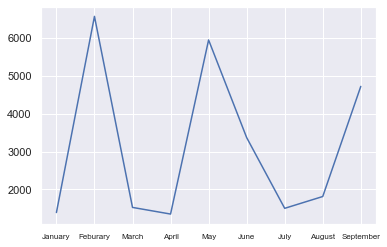

In [9]:
# Get the column values as a list
dengue_cols = list(dengue_2020_pivot.columns.values)
plt.plot(dengue_cols,dengue_2020_pivot.iloc[0])
plt.tick_params('x',labelsize=8)

<span> Plotting a subplot of temperature, rainfall and the relationship it has with the number of dengue fever cases</h2>

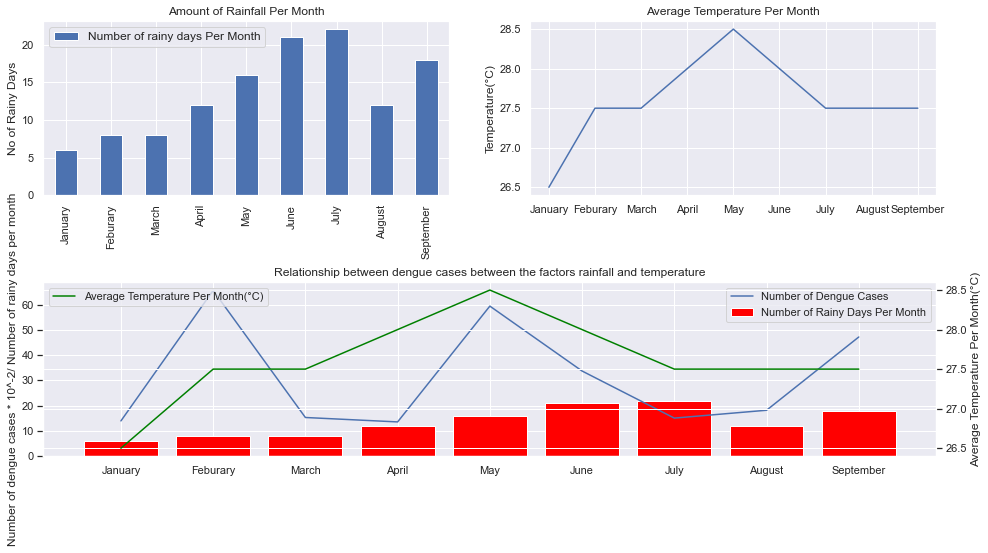

In [10]:
fig_dimensions = (16,8)
fig = plt.figure(figsize = fig_dimensions)
ax1 = fig.add_subplot(2,2,1)
relevant_rainfall_df.plot(x = 'month', y = 'no_of_rainy_days', ax=ax1, kind='bar')
ax1.set_title('Amount of Rainfall Per Month')
ax1.legend(['Number of rainy days Per Month'], fontsize=12)
ax1.set_ylabel('No of Rainy Days')
ax1.set_xlabel('')
ax2 = fig.add_subplot(2,2,2)
# Drop Irrelevant columns 
try:
    temperature_df.drop(['Month','Oct','Nov','Dec'],axis=1,inplace=True)
except:
    pass
temperature_df.columns=["January", "Feburary","March","April","May","June","July","August","September"]
temperature_cols = list(temperature_df.columns.values)
ax2.plot(temperature_cols,temperature_df.loc[2,'January':'September'])
ax2.set_title('Average Temperature Per Month')
ax2.set_ylabel('Temperature(°C)')
fig.subplots_adjust(hspace=.5)
ax3 = fig.add_subplot(2,1,2)
# As the number of dengue cases are too huge , we scale it down by dividing it down by 100.
ax3.set_title('Relationship between dengue cases between the factors rainfall and temperature')
ax3.plot(dengue_cols,dengue_2020_pivot.iloc[0]/100)
ax3.bar(relevant_rainfall_df['month'],relevant_rainfall_df['no_of_rainy_days'],color='red')
ax3.set_ylabel('Number of dengue cases * 10^-2/ Number of rainy days per month')
ax4 = ax3.twinx()
ax4.set_ylabel('Average Temperature Per Month(°C)')
ax4.plot(temperature_cols,temperature_df.loc[2,'January':'September'],color='green',label='Average Temperature Per Month(°C)')
ax3.legend(["Number of Dengue Cases","Number of Rainy Days Per Month"])
ax4.legend(loc="upper left")

<h2> Using Machine Learning to find out the relationship between the explored factors and the number of dengues cases, and predict further trends</h2>
 
<span> Creating a combined dataframe for both temperature and rainfall</span>

In [11]:
# Take the data of the average temperature and create a new datframe
combined_df = pd.DataFrame(data=temperature_df.iloc[2].values,columns=["Avg (°C)"])
combined_df["Rainy Days Per Month"] = relevant_rainfall_df["no_of_rainy_days"]
combined_df


,Avg (°C),Rainy Days Per Month
0,26.5,6
1,27.5,8
2,27.5,8
3,28.0,12
4,28.5,16
5,28.0,21
6,27.5,22
7,27.5,12
8,27.5,18


<span> Detect for multicollinearity and drop variables where necessary by using .corr()</span>

In [12]:
combined_df_corr = combined_df.corr()
combined_df_corr

,Avg (°C),Rainy Days Per Month
Avg (°C),1.000000,0.499789
Rainy Days Per Month,0.499789,1.000000


<span> Training the Model </span>

In [22]:
from sklearn.model_selection import train_test_split
factors_dengue = combined_df[['Avg (°C)','Rainy Days Per Month']]
X_train, X_test, y_train, y_test =  train_test_split(factors_dengue,dengue_2020_pivot.iloc[0],random_state=42)

<span> Fit the Model </span>

In [19]:
from sklearn import datasets, linear_model
dengue_lr = linear_model.LinearRegression()
dengue_lr.fit(X_train, y_train)

LinearRegression()

<span> Intepret the Model </span>

In [20]:
print(dengue_lr.coef_)
print(dengue_lr.intercept_)
# dengue_cases = -39139.657229524775 + 1487.58543984 (Avg(°C)) + 6187.25985844((Rainy Days Per Month)) 

[1487.58543984 6187.25985844]
-39139.657229524775


<span> Acessing the Model</span>

In [21]:
from sklearn.metrics import r2_score 
fitted_values = dengue_lr.predict(X_test)
print(r2_score(y_test, fitted_values))

-0.635039380245128


<h2> Insights/Evaluation</h2>
<p> As the number of rainydays and the temperature in singapore has been fairly constant,the amount of dengue 
    cases to be too scattered and the r2_score shows that these variables are not lineally related, hence we must do
    explanatory analysis of other factors to predict the number of dengue cases in Singpore, such as dengue outbreak in other countries which may have cause a rise in the Aedes Mosquito Population </p>